<a href="https://colab.research.google.com/github/disenodc/MachineLearning_UNS/blob/main/TP3_3_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP 3_3 SPOTIFY

En el notebook https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/musica.ipynb hay un dataset con 2000+ canciones de
Spotify de una usuaria, donde algunas fueron marcadas como gustadas y otras
no. Cada canción tiene a su vez 16 atributos (nombre, artista, duración,
bailable, etc.). Desarrollar un clasificador que prediga si una canción dada va a ser gustada o no. 

In [2]:
# Importo librerias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split

In [12]:
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/disenodc/MachineLearning_UNS/main/data.csv")
attributes_spotify.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [14]:
attributes_spotify.drop(columns = ["Unnamed: 0","song_title","artist"])

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0


In [47]:
x = attributes_spotify[['energy','loudness','acousticness', 'danceability','duration_ms','liveness','speechiness','tempo','time_signature','valence']].values
y = attributes_spotify['target'].values

In [235]:
# Separo los conjuntos en entrenamiento y prueba
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=150)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [236]:
print(attributes_spotify.groupby('target').size())


target
0     997
1    1020
dtype: int64


In [237]:
# Entreno el modelo

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn.fit(X_test, y_test)


KNeighborsClassifier()

In [238]:
#calculando precision del modelo
print(knn.score(X_train, y_train))

0.6254626202812731


In [239]:
#Calculo la precision del modelo
print(knn.score(X_test, y_test))

0.8003003003003003


Hacer FOR variando K y 

EL valor maximo -> valor K optimo = mayor score

Entrenar otro modelo K optimo

Matriz de confusion

([<matplotlib.axis.XTick at 0x7fd763b95190>,
 <a list of 3 Text major ticklabel objects>)

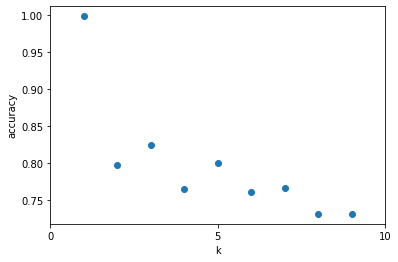

In [240]:
# Elegir el mejor valor de k y graficar score en funcion

k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    # knn.fit(X_train, y_train)
    knn.fit(X_test, y_test)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10])

In [241]:
# Entreno el modelo con el K optimo
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

#calculando precision del modelo
print(knn.score(X_train, y_train))

#Calculo la precision del modelo
print(knn.score(X_test, y_test))

0.6232420429311621
0.8243243243243243


In [242]:
#Prediccion Confusion Matrix
prediccion = knn.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, prediccion)

print(Confusion_Matrix)
print(classification_report(y_test, prediccion))

print(prediccion)

[[287  49]
 [ 68 262]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       336
           1       0.84      0.79      0.82       330

    accuracy                           0.82       666
   macro avg       0.83      0.82      0.82       666
weighted avg       0.83      0.82      0.82       666

[1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1
 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0

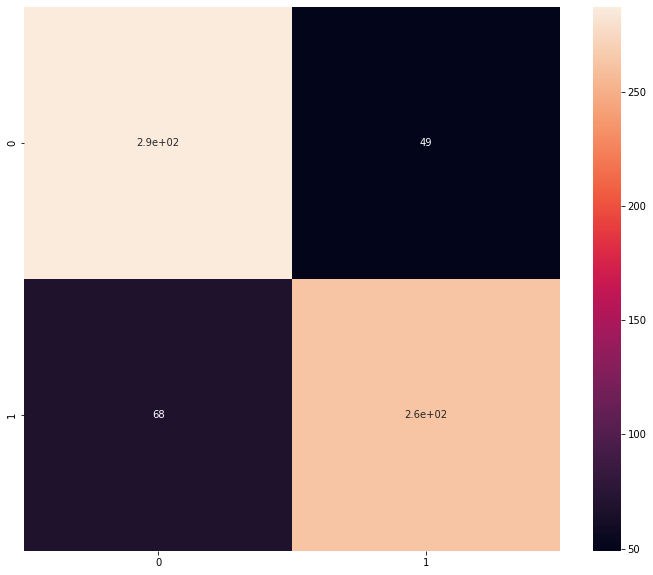

In [243]:
# Matriz de confusion

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(Confusion_Matrix, annot=True);
